In [2]:
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from scipy import stats
%matplotlib inline

In [5]:
pd.set_option('display.notebook_repr_html', False)

In [6]:
data = np.array([1.0, 2.0, 3.0, 4.0])
print(data)

[1. 2. 3. 4.]


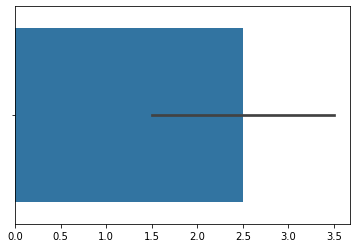

In [7]:
p = sns.barplot(data)

In [8]:
population_mu = data.mean()
print(population_mu)

2.5


In [9]:
population_sigma = data.std(ddof = 0)
print(population_sigma)

1.118033988749895


### Central Limit Theorem (CLT)
``` What Is the Central Limit Theorem (CLT)?
In the study of probability theory, the central limit theorem (CLT) states that the distribution of sample means approximates a normal distribution (also known as a “bell curve”), as the sample size becomes larger, assuming that all samples are identical in size, and regardless of the population distribution shape.```


```Said another way, CLT is a statistical theory stating that given a sufficiently large sample size from a population with a finite level of variance, the mean of all samples from the same population will be approximately equal to the mean of the population. Furthermore, all the samples will follow an approximate normal distribution pattern, with all variances being approximately equal to the variance of the population, divided by each sample's size.```

```Although this concept was first developed by Abraham de Moivre in 1733, it wasn’t formally named until 1930, when noted Hungarian mathematician George Polya officially dubbed it the Central Limit Theorem. For More ditails please visit this web site ```https://www.investopedia.com/terms/c/central_limit_theorem.asp

In [10]:
possible_outcomes = 4**2
print(possible_outcomes)

16


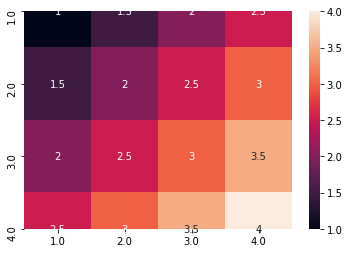

In [13]:
mean_outcomes = pd.DataFrame(index = data, dtype='float64', columns=data)
for x in data:
    for y in data:
        mean_outcomes[x][y] = np.mean([x, y])
        
        
p = sns.heatmap(mean_outcomes, annot=True)

In [17]:
sample_mean = mean_outcomes.mean()
out_mean = sample_mean.mean()
print(sample_mean)
print(out_mean)

1.0    1.75
2.0    2.25
3.0    2.75
4.0    3.25
dtype: float64
2.5


In [19]:
population_mu == out_mean

True

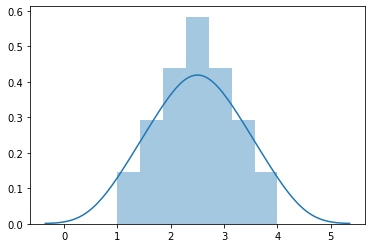

In [20]:
different_value_count = mean_outcomes.stack().value_counts().count()
p = sns.distplot(mean_outcomes.stack(), bins = different_value_count)

### The Standard Error

In [21]:
mean_outcomes_se = mean_outcomes.stack().std(ddof = 0)
mean_outcomes_se

0.7905694150420949

In [22]:
ratio_sigma_se = population_sigma/mean_outcomes_se
ratio_sigma_se

1.414213562373095

In [23]:
ratio_sigma_se**2

1.9999999999999996

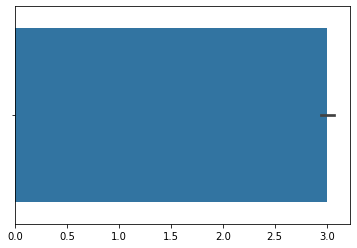

In [24]:
non_normal_data = np.random.choice(data, 1000,  p = [0.10, 0.20, 0.30, 0.40])
p = sns.barplot(non_normal_data)

In [25]:
non_normal_data.mean()

3.001

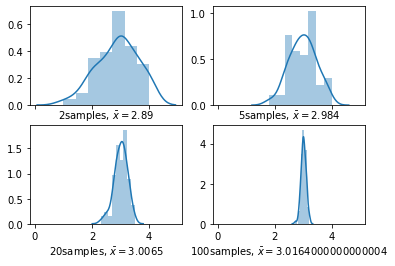

In [26]:
f, (ax1, ax2) = plt.subplots(2, 2, sharex=True)
axes = [ax1[0], ax1[1],ax2[0], ax2[1]]
ax = 0
for sample in [2, 5,20, 100]:
    sampling_distribution = []
    for i in range(100):
        mean_sample = np.random.choice(non_normal_data, sample).mean()
        sampling_distribution.append(mean_sample)
        
        
    p = sns.distplot(sampling_distribution, ax = axes[ax], 
                    axlabel=str(sample) + 'samples, $\\bar{x}=$'+str(np.mean(sampling_distribution)))
    
    ax+=1